<a href="https://colab.research.google.com/github/BIRAN/SAS_Visual_Forecasting/blob/master/statistical_method/ESM_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESM (Exponential Smoothing model)



In [0]:
from pandas import read_csv
import pandas as pd
import numpy as np
import time
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO

%matplotlib inline

In [0]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

url = 'https://raw.githubusercontent.com/BIRAN/SAS_Visual_Forecasting/master/statistical_method/air_date.csv'
series = pd.read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

Fitting a Holt-Winter’s Seasonal Smoothing model with damped trend.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1961-01-01    449.427431
1961-02-01    424.545260
1961-03-01    482.614914
1961-04-01    505.244421
1961-05-01    520.892599
1961-06-01    598.167731
1961-07-01    691.441368
1961-08-01    684.542223
1961-09-01    568.138538
1961-10-01    503.261609
1961-11-01    429.990647
1961-12-01    478.401822
Freq: MS, dtype: float64


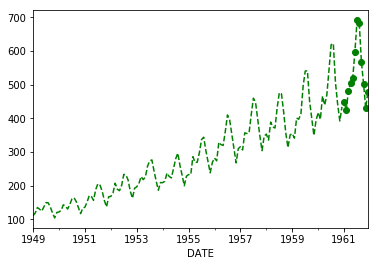

Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.


In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit1 = ExponentialSmoothing(series, seasonal_periods=12, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
print(fit1.forecast(12))
fit1.fittedvalues.plot(style='--', color='green')
fit1.forecast(12).plot(style='--', marker='o', color='green')

plt.show()
print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1961-01-01    449.956074
1961-02-01    425.275537
1961-03-01    483.846004
1961-04-01    506.648325
1961-05-01    522.576443
1961-06-01    600.433929
1961-07-01    694.258341
1961-08-01    687.531150
1961-09-01    570.753710
1961-10-01    505.677066
1961-11-01    432.221214
1961-12-01    481.371581
Freq: MS, dtype: float64


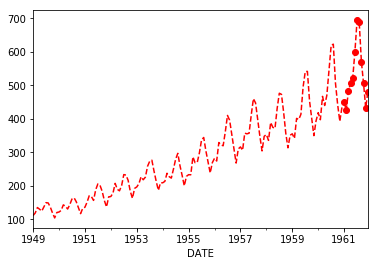

Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.


In [16]:
fit2 = ExponentialSmoothing(series, seasonal_periods=12, trend='add', seasonal='mul').fit(use_boxcox=True)
print(fit2.forecast(12))
fit2.fittedvalues.plot(style='--', color='red')
fit2.forecast(12).plot(style='--', marker='o', color='red')

plt.show()
print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")

In [18]:
# Comparing the SSE with these two models

sse_1 = fit1.sse
sse_2 = fit2.sse

print('The sum of squared errors of Model_1 is %f and Model_2 is %f.' % (sse_1, sse_2))

The sum of squared errors of Model_1 is 15961.357123 and Model_2 is 15996.786879.
